## Import Dependancies 

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

#### Time Dependent Cox Proportional Hazards Model 

In [226]:
final_data=pd.read_csv('/kaggle/working/Modelling_data.csv')
final_data.shape

(281, 22)

#### Data Transformation

In [227]:
import pandas as pd

def reshape_for_time_dependent_cox(data):
    data= data.copy()
    # Grade columns in order
    grade_cols = ['Year_one', 'Year_two', 'Year_three', 'Year_four']

    supplementary = ['year1_supplementary',  'Year2_supplementary', 'Year3_supplementary','Year4_supplementary']

    work_study = ['Year1_work_study',  'Year2_work_study', 'Year3_work_study','Year4_work_study']

    remark = ['Year1_remark','Year2_remark', 'Year3_remark', 'Year4_remarks']

    # Store new rows
    new_rows = []

    for idx, row in data.iterrows():
        dropout_year = row['Time'] # When dropout happened
        event = int(row['Event'])  # 1 = dropout, 0 = completed

        for year in range(1, 5):
            if year > dropout_year:
                break  # Student never reached this year

            start_time = year - 1
            stop_time = year

            # Event occurs if this year == dropout year and Event=1
            event_at_stop = 1 if (year == dropout_year and event == 1) else 0

            new_rows.append({
                'reg_no': row['reg_no'],
                'Gender': row['Gender'],
                'Department': row['Department'],
                'Settlement Type': row['Settlement Type'],
                'start_time': start_time,
                'stop_time': stop_time,
                'Year': year,
                'Grade': row[grade_cols[year-1]],
                'supplementary' : row[supplementary[year-1]],
                'work_study' : row[work_study[year-1]],
                # 'remark' : row[remark[year-1]],
                'Event': event_at_stop
            })

    long_df = pd.DataFrame(new_rows)
    long_df = long_df.sort_values(by=['reg_no', 'start_time']).reset_index(drop=True)
    return long_df
long_format=reshape_for_time_dependent_cox(final_data)

In [228]:
long_format.drop('reg_no',axis=1)

,Gender,Department,Settlement Type,start_time,stop_time,Year,Grade,supplementary,work_study,Event
0,Male,IC,GOK,0,1,1,C,0.0,0.0,0
1,Male,IC,GOK,1,2,2,D,0.0,0.0,0
2,Male,IC,GOK,2,3,3,D,1.0,0.0,1
3,Male,IC,GOK,0,1,1,D,1.0,0.0,0
4,Male,IC,GOK,1,2,2,D,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
913,Male,INST,GOK,0,1,1,C,0.0,0.0,0
914,Male,INST,GOK,1,2,2,B,0.0,0.0,0
915,Male,INST,GOK,2,3,3,C,0.0,0.0,0
916,Male,INST,GOK,3,4,4,C,0.0,0.0,1


In [230]:
pd.set_option("display.max_columns",None)

unique_count = long_format.reg_no.value_counts().reset_index()
one = unique_count[unique_count['count'] == 1]
final_data[final_data.reg_no.isin(set(one.reg_no))].drop('reg_no',axis=1) #this makes sense 

,Settlement Type,Gender,Department,Year_one,Year1_remark,Year1_work_study,year1_supplementary,Time,Year_two,Year2_remark,Year2_work_study,Year2_supplementary,Year_three,Year3_remark,Year3_work_study,Year3_supplementary,Year_four,Year4_remarks,Year4_work_study,Year4_supplementary,Event
10,GOK,Male,IC,C,SUPP,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
20,GOK,Male,IC,C,PASS,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
29,GOK,Male,IC,B,PASS,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
38,GOK,Male,IC,E,"7 FAILS,RP1/",0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
47,GOK,Male,AC,D,SUPP,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
57,GOK,Male,AC,E,FINANCIAL GROUNDS ACADEMIC LEAVE ON,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61,GOK,Female,AC,B,SUPP,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
77,GOK,Male,APCS,E,"DEREGISTER, ABSCONDED",0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
84,GOK,Male,APCS,C,SUPP,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
86,GOK,Male,APCS,D,SUPP,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [233]:
long_format.Department.value_counts().index

Index(['MCS', 'RET', 'IC', 'AC', 'APCS', 'INST', 'AOL'], dtype='object', name='Department')

### Encoding Categorical Varibales 

In [234]:
gender= {"Male":1, "Female":0}

dept= {'MCS':1, 'RET':2, 'IC':3, 'APCS':4, 'AC':5, 'INST':6, 'AOL':7}

settlement={"GOK":1, "SSP":0}

grades={"A":1,"B":2,"C":3,"D":4,"E":5}

long_format['Gender'] = long_format['Gender'].map(gender)
long_format['Department'] = long_format['Department'].map(dept)
long_format['Settlement Type'] = long_format['Settlement Type'].map(settlement)
long_format['Grade'] = long_format['Grade'].map(grades)


In [235]:
long_format[long_format.Grade.isnull()].drop('reg_no',axis=1)

,Gender,Department,Settlement Type,start_time,stop_time,Year,Grade,supplementary,work_study,Event
37,1,3,1,2,3,3,NaN,NaN,NaN,1
78,1,3,1,2,3,3,NaN,NaN,NaN,1
116,1,3,1,2,3,3,NaN,NaN,NaN,1
123,1,3,1,2,3,3,NaN,NaN,NaN,1
188,1,5,1,2,3,3,NaN,0.0,0.0,0
216,1,5,1,2,3,3,NaN,NaN,NaN,1
231,0,5,1,2,3,3,NaN,NaN,NaN,1
238,0,5,1,2,3,3,NaN,NaN,NaN,1
241,0,5,1,2,3,3,NaN,NaN,NaN,1
275,1,4,1,2,3,3,NaN,NaN,NaN,1


In [236]:
long_format.dropna(inplace=True)

In [239]:
long_format = long_format.drop(columns=['Year','remark'],axis=1,errors='ignore').rename(columns={"Settlement Type":"settlement"})

In [240]:
long_format.to_csv('Final_time_dependent_data.csv',index=False)

In [242]:
long_format.drop('reg_no',axis=1)

,Gender,Department,settlement,start_time,stop_time,Grade,supplementary,work_study,Event
0,1,3,1,0,1,3.0,0.0,0.0,0
1,1,3,1,1,2,4.0,0.0,0.0,0
2,1,3,1,2,3,4.0,1.0,0.0,1
3,1,3,1,0,1,4.0,1.0,0.0,0
4,1,3,1,1,2,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
913,1,6,1,0,1,3.0,0.0,0.0,0
914,1,6,1,1,2,2.0,0.0,0.0,0
915,1,6,1,2,3,3.0,0.0,0.0,0
916,1,6,1,3,4,3.0,0.0,0.0,1


In [243]:
# Check for columns with only one unique value
constant_cols = [col for col in long_format.columns if long_format[col].nunique() == 1]

print("Constant columns:", constant_cols)


Constant columns: []


In [244]:
# Check correlation matrix
corr_cols=[col for col in long_format.columns if col not in ['reg_no','']]
correlation_matrix = long_format[corr_cols].corr()

# Find pairs with high correlation (>0.9)
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if (col1 != col2) and (abs(correlation_matrix.loc[col1, col2]) > 0.9)]

print("Highly correlated pairs:", high_corr_pairs)


Highly correlated pairs: [('start_time', 'stop_time'), ('stop_time', 'start_time')]


### CoxTimeVarying Fitter Model 

In [217]:
!pip install lifelines -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.7 MB/s eta 0:00:00


In [245]:
import pandas as pd
from lifelines import CoxTimeVaryingFitter

# Assuming you have the "long_final_data" created earlier

# Initialize the model
ctv1 = CoxTimeVaryingFitter()

# Fit the model
ctv1.fit(long_format, 
        id_col="reg_no", 
        start_col="start_time", 
        stop_col="stop_time", 
        event_col="Event",show_progress=True)

# Show the summary
ctv1.print_summary()


Iteration 1: norm_delta = 1.69e+00, step_size = 0.9500, log_lik = -571.81535, newton_decrement = 1.18e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 8.10e-01, step_size = 0.9500, log_lik = -542.04431, newton_decrement = 6.48e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.95e-01, step_size = 0.9500, log_lik = -486.47574, newton_decrement = 7.00e+00, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.41e-02, step_size = 1.0000, log_lik = -479.48404, newton_decrement = 3.48e-02, seconds_since_start = 0.0
Iteration 5: norm_delta = 2.70e-04, step_size = 1.0000, log_lik = -479.44900, newton_decrement = 5.95e-06, seconds_since_start = 0.0
Iteration 6: norm_delta = 5.89e-08, step_size = 1.0000, log_lik = -479.44899, newton_decrement = 3.54e-13, seconds_since_start = 0.0
Convergence completed after 6 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 888 periods, 281 subjects, 107 events>
         event col = 'Event'
number of subjects = 281
 number of periods = 888
  number of events = 107
partial log-likelihood = -479.45
  time fit was run = 2025-05-09 14:01:26 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
Gender         0.68      1.97      0.27            0.15            1.20                1.16                3.34
Department     0.12      1.13      0.05            0.02            0.22                1.02                1.25
settlement    -1.76      0.17      0.35           -2.45           -1.07                0.09                0.34
Grade          1.33      3.79      0.12            1.10            1.56                3.00                4.77
supplementary -0.50      0.60      0.22           -0.93           -0.08                0.40                0.92
work_study     0.79      2.21      1.03           -1.22            2.81                0.29               16.58

               cmp to     z      p  -log2(p)
covariate                                   
Gender           0.00  2.50   0.01      6.35
Department       0.00  2.30   0.02      5.55
settlement       0.00 -5.01 <0.005     20.78
Grade            0.00 11.28 <0.005     95.62
supplementary    0.00 -2.33   0.02      5.67
work_study       0.00  0.77   0.44      1.18
---
Partial AIC = 970.90
log-likelihood ratio test = 184.73 on 6 df
-log2(p) of ll-ratio test = 121.17

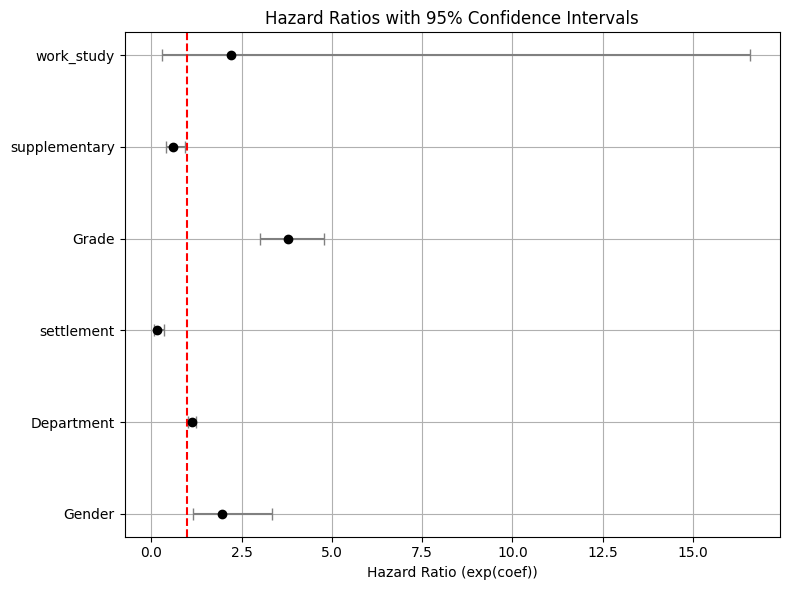

In [246]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assume your fitted model is called `cph`
summary_df = ctv1.summary.copy()

# Prepare the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Extract values
variables = summary_df.index
hr = summary_df['exp(coef)']
lower_ci = summary_df['exp(coef) lower 95%']
upper_ci = summary_df['exp(coef) upper 95%']

# Plot the hazard ratios
ax.errorbar(hr, variables, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Reference line at HR=1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

# Labels and title
ax.set_xlabel('Hazard Ratio (exp(coef))')
ax.set_title('Hazard Ratios with 95% Confidence Intervals')
ax.grid(True)

plt.tight_layout()
plt.show()


### An Interaction Time dependent Cox PH Model

In [247]:
interaction_data=long_format.copy()
interaction_data["Grade_supplementary"] = interaction_data["Grade"] * interaction_data["supplementary"]

# Initialize the model
ctv2 = CoxTimeVaryingFitter()


ctv2.fit(
    interaction_data,
    id_col="reg_no",
    start_col="start_time",
    stop_col="stop_time",
    event_col="Event", show_progress=True,
    formula="Gender + Department + settlement + Grade + supplementary + Grade_supplementary"
)
# Show the summary
ctv2.print_summary()


Iteration 1: norm_delta = 2.93e+00, step_size = 0.9500, log_lik = -571.81535, newton_decrement = 1.24e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.35e+00, step_size = 0.9500, log_lik = -545.86883, newton_decrement = 8.65e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.35e+00, step_size = 0.9500, log_lik = -495.66174, newton_decrement = 2.42e+01, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.93e-01, step_size = 0.9310, log_lik = -474.28211, newton_decrement = 6.47e-01, seconds_since_start = 0.0
Iteration 5: norm_delta = 7.40e-03, step_size = 0.9124, log_lik = -473.64599, newton_decrement = 2.17e-03, seconds_since_start = 0.0
Iteration 6: norm_delta = 7.55e-04, step_size = 1.0000, log_lik = -473.64383, newton_decrement = 1.69e-05, seconds_since_start = 0.0
Iteration 7: norm_delta = 5.02e-07, step_size = 1.0000, log_lik = -473.64382, newton_decrement = 2.72e-13, seconds_since_start = 0.0
Convergence completed after 7 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 888 periods, 281 subjects, 107 events>
         event col = 'Event'
number of subjects = 281
 number of periods = 888
  number of events = 107
partial log-likelihood = -473.64
  time fit was run = 2025-05-09 14:03:14 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
Gender               0.70      2.01      0.27            0.17            1.23                1.18                3.42
Department           0.12      1.13      0.05            0.02            0.22                1.02                1.24
settlement          -1.72      0.18      0.35           -2.41           -1.04                0.09                0.35
Grade                1.53      4.62      0.14            1.26            1.80                3.53                6.03
supplementary        3.52     33.89      1.15            1.26            5.78                3.54              324.43
Grade_supplementary -1.04      0.35      0.30           -1.63           -0.45                0.20                0.64

                     cmp to     z      p  -log2(p)
covariate                                         
Gender                 0.00  2.58   0.01      6.68
Department             0.00  2.30   0.02      5.55
settlement             0.00 -4.91 <0.005     20.08
Grade                  0.00 11.20 <0.005     94.30
supplementary          0.00  3.06 <0.005      8.80
Grade_supplementary    0.00 -3.46 <0.005     10.88
---
Partial AIC = 959.29
log-likelihood ratio test = 196.34 on 6 df
-log2(p) of ll-ratio test = 129.37

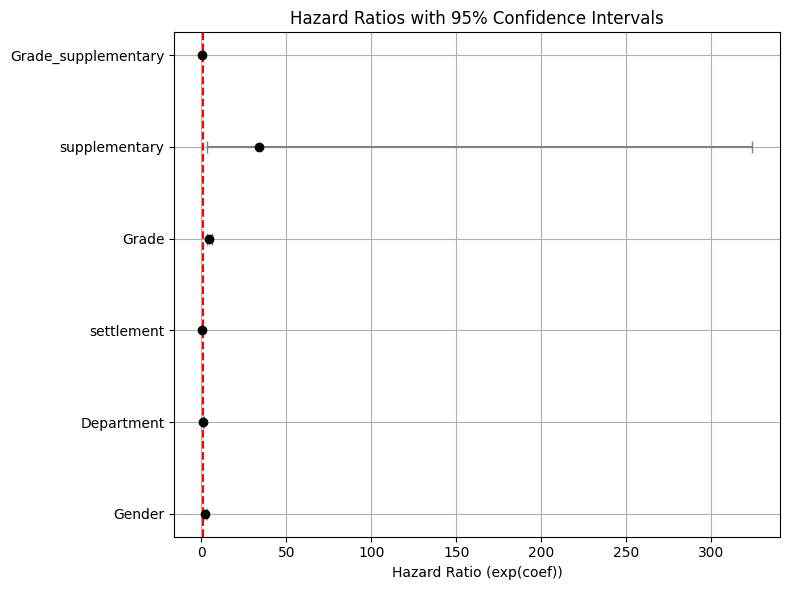

In [248]:
# Assume your fitted model is called `cph`
summary_df = ctv2.summary.copy()

# Prepare the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Extract values
variables = summary_df.index
hr = summary_df['exp(coef)']
lower_ci = summary_df['exp(coef) lower 95%']
upper_ci = summary_df['exp(coef) upper 95%']

# Plot the hazard ratios
ax.errorbar(hr, variables, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Reference line at HR=1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

# Labels and title
ax.set_xlabel('Hazard Ratio (exp(coef))')
ax.set_title('Hazard Ratios with 95% Confidence Intervals')
ax.grid(True)

plt.tight_layout()
plt.savefig("Interaction model")
plt.show()


## Baseline Time Independent Cox PH Model

In [252]:
baseline_data = long_format.sort_values(["reg_no", "start_time"]).groupby("reg_no").last().reset_index()

In [253]:
baseline_data = baseline_data.dropna(subset=corr_cols)

# Step 2: Remove constant columns
for col in corr_cols:
    if baseline_data[col].nunique() == 1:
        corr_cols.remove(col)


In [254]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(baseline_data[corr_cols], duration_col="stop_time", event_col="Event")


<lifelines.CoxPHFitter: fitted with 281 total observations, 174 right-censored observations>

In [255]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 281 total observations, 174 right-censored observations>
             duration col = 'stop_time'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 281
number of events observed = 107
   partial log-likelihood = -324.39
         time fit was run = 2025-05-09 14:04:06 UTC

---
                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                       
Gender          0.20      1.22      0.28           -0.34            0.74                0.71                2.10
Department      0.01      1.01      0.05           -0.09            0.11                0.92                1.12
settlement      0.04      1.04      0.36           -0.67            0.74                0.51                2.09
start_time    -22.90      0.00   3362.99        -6614.24         6568.44                0.00                 inf
Grade           0.16      1.18      0.12           -0.08            0.41                0.92                1.50
supplementary  -0.27      0.76      0.22           -0.70            0.16                0.50                1.17
work_study      0.00      1.00      1.03           -2.01            2.02                0.13                7.50

               cmp to     z    p  -log2(p)
covariate                                 
Gender           0.00  0.73 0.46      1.11
Department       0.00  0.26 0.79      0.34
settlement       0.00  0.10 0.92      0.12
start_time       0.00 -0.01 0.99      0.01
Grade            0.00  1.31 0.19      2.41
supplementary    0.00 -1.25 0.21      2.23
work_study       0.00  0.00 1.00      0.01
---
Concordance = 0.99
Partial AIC = 662.78
log-likelihood ratio test = 500.33 on 7 df
-log2(p) of ll-ratio test = 342.71

In [256]:
cph.check_assumptions(baseline_data[corr_cols], p_value_threshold=0.005) #all assumption of the cox model are satisified 

Proportional hazard assumption looks okay.


[]

In [257]:
residuals = cph.compute_residuals(baseline_data[corr_cols], kind="scaled_schoenfeld")
residuals

covariate,Gender,Department,settlement,start_time,Grade,supplementary,work_study
10,0.646117,-0.369081,4.018460,-2.111831,-1.756117,3.415315,-2.374483
20,0.304797,-0.350973,4.527923,-3.245272,-2.224870,-1.730645,-1.253467
29,0.490762,-0.329767,4.416044,-4.821530,-3.890699,-2.199398,-3.016015
34,-3.884022,-0.339231,-5.835622,-0.372116,-0.016202,4.052211,-0.322911
39,-0.067134,-0.393387,4.751682,-0.092757,1.106787,-0.793139,2.271628
...,...,...,...,...,...,...,...
202,2.693054,1.039845,-1.421183,2.231366,1.624798,-1.328421,-2.390422
212,1.992227,-0.291057,-0.390989,-0.023851,0.065004,-1.706638,-1.271517
224,1.992227,-0.291057,-0.390989,-0.023851,0.065004,-1.706638,-1.271517
252,2.701661,0.790630,-1.304647,0.519317,-0.019824,-1.779067,-3.576679



   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


<Figure size 2000x2000 with 0 Axes>

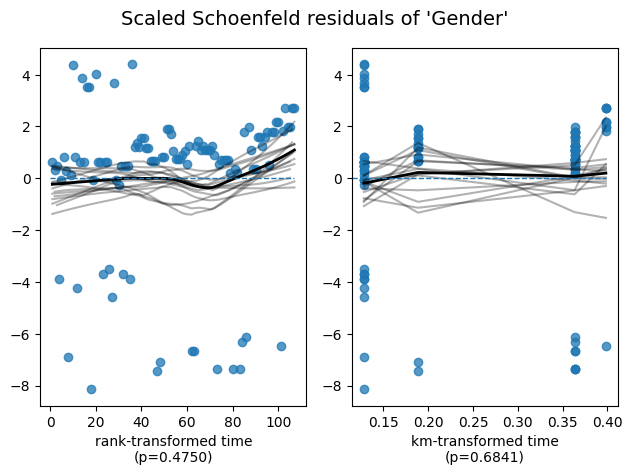

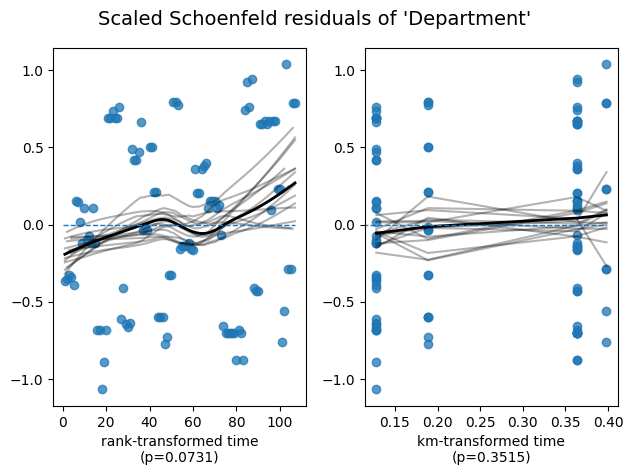

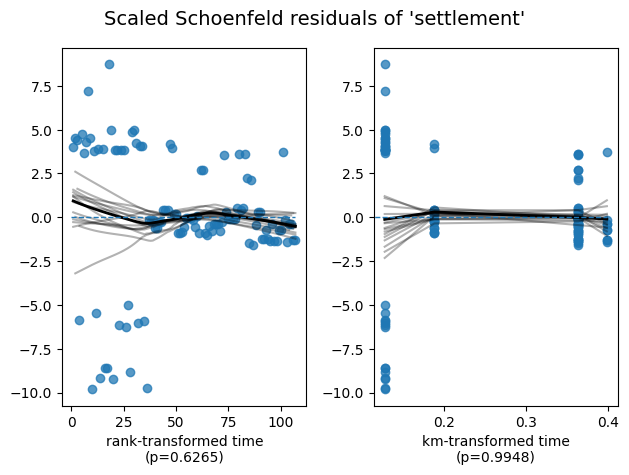

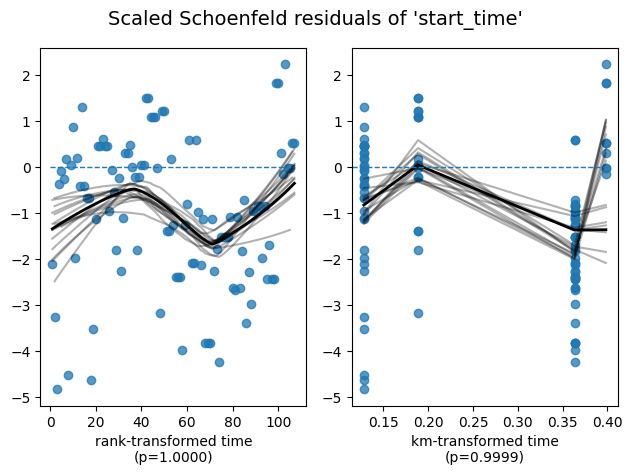

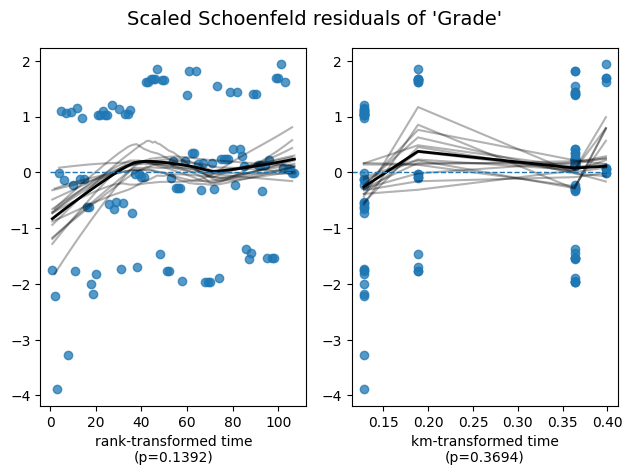

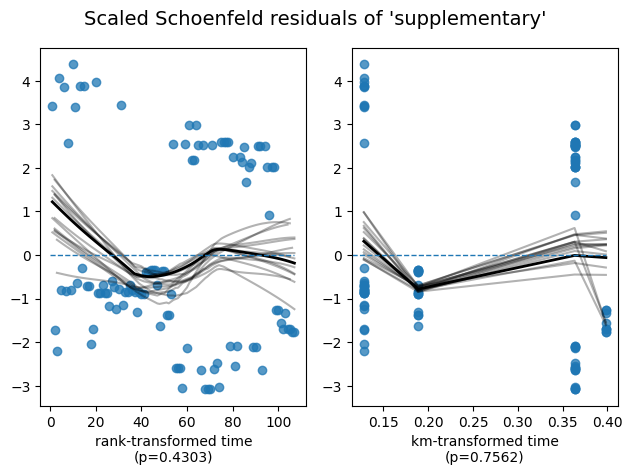

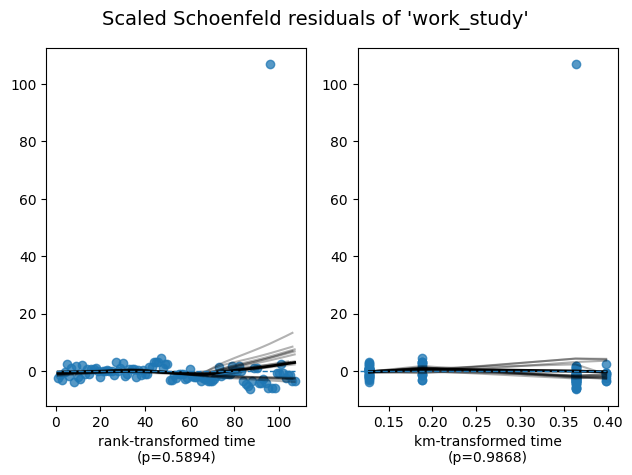

In [258]:
plt.figure(figsize=(20,20))
cph.check_assumptions(baseline_data[corr_cols], show_plots=True)
plt.show()

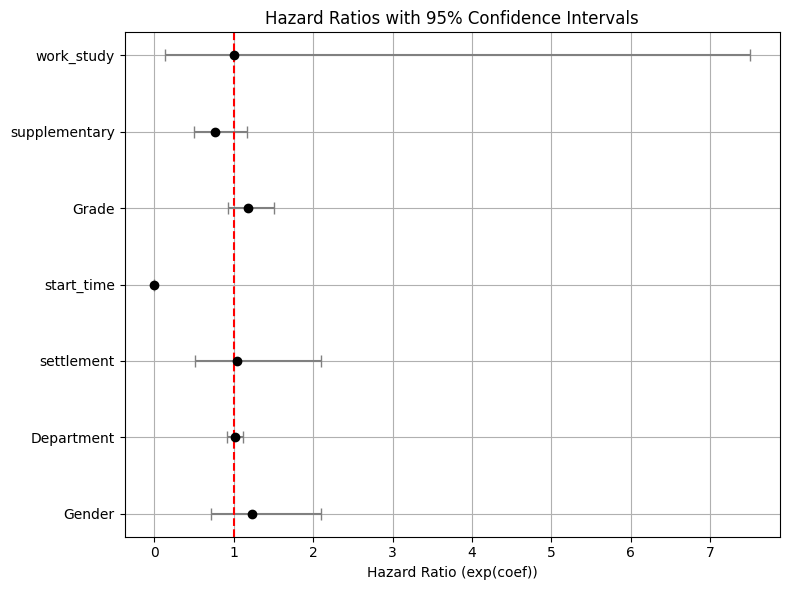

In [262]:
# Assume your fitted model is called `cph`
summary_df = cph.summary.copy()

# Prepare the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Extract values
variables = summary_df.index
hr = summary_df['exp(coef)']
lower_ci = summary_df['exp(coef) lower 95%']
upper_ci = summary_df['exp(coef) upper 95%']

# Plot the hazard ratios
ax.errorbar(hr, variables, xerr=[hr - lower_ci, upper_ci - hr], fmt='o', color='black', ecolor='gray', capsize=4)

# Reference line at HR=1 (no effect)
ax.axvline(x=1, color='red', linestyle='--')

# Labels and title
ax.set_xlabel('Hazard Ratio (exp(coef))')
ax.set_title('Hazard Ratios with 95% Confidence Intervals')
ax.grid(True)

plt.tight_layout()
plt.savefig("Baseline HR model")
plt.show()


## Kaplan Miere Estimator 

In [263]:
final_data.shape

(281, 22)

In [264]:
final_data.rename(columns={'Time': 'duration'},inplace=True)

<Axes: ylabel='duration'>

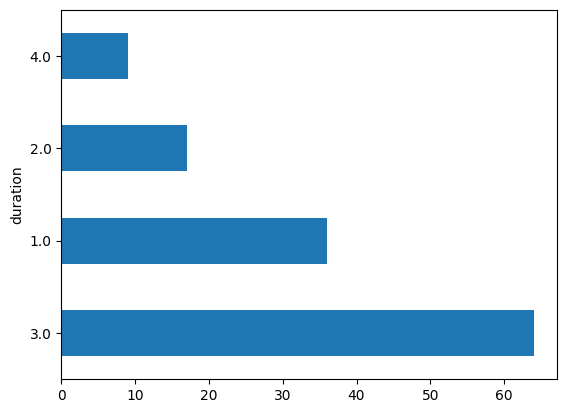

In [265]:
final_data.duration.value_counts().plot(kind='barh')

In [266]:
final_data[final_data.duration.isnull()].isnull().sum()

reg_no                   0
Settlement Type          0
Gender                   0
Department               0
Year_one                 0
Year1_remark             0
Year1_work_study         0
year1_supplementary      0
duration               155
Year_two                 0
Year2_remark             0
Year2_work_study         0
Year2_supplementary      0
Year_three              10
Year3_remark             9
Year3_work_study         9
Year3_supplementary      9
Year_four                0
Year4_remarks            0
Year4_work_study         0
Year4_supplementary      0
Event                    0
dtype: int64

In [267]:
final_data.loc[final_data.duration.isnull(), "duration"] = 4 # studied for four years and did not experience the event of interest

In [268]:
final_data.isnull().sum()

reg_no                   0
Settlement Type          0
Gender                   0
Department               0
Year_one                 0
Year1_remark             0
Year1_work_study         0
year1_supplementary      0
duration                 0
Year_two                36
Year2_remark            36
Year2_work_study        36
Year2_supplementary     36
Year_three              83
Year3_remark            82
Year3_work_study        82
Year3_supplementary     82
Year_four              116
Year4_remarks          116
Year4_work_study       116
Year4_supplementary    116
Event                    0
dtype: int64

In [269]:
final_data.duration.value_counts()

duration
4.0    164
3.0     64
1.0     36
2.0     17
Name: count, dtype: int64

## Gender

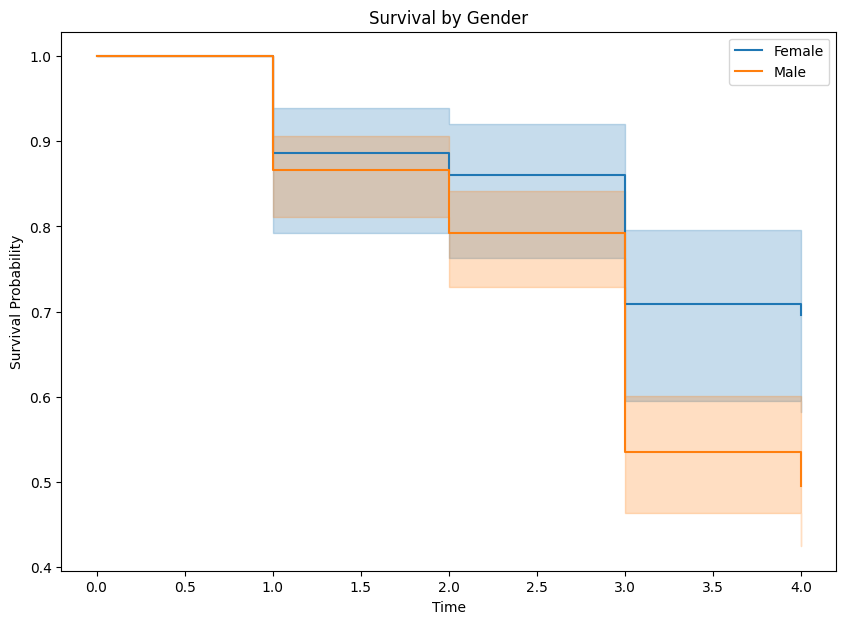

In [270]:
from lifelines import KaplanMeierFitter


kmf = KaplanMeierFitter()
plt.figure(figsize=(10,7))
# For example, Gender comparison
for label, group_df in final_data.groupby('Gender'):
    kmf.fit(group_df['duration'], event_observed=group_df['Event'], label=str(label))
    kmf.plot_survival_function()

plt.title('Survival by Gender')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()
# female have a higher survival rate compared to Males in FOST

In [271]:
from lifelines import KaplanMeierFitter
import pandas as pd

from lifelines import KaplanMeierFitter
import pandas as pd

def get_km_table_for_department(data, department):
    kmf = KaplanMeierFitter()
    dept_data = data[data['Department'] == department]

    kmf.fit(dept_data['duration'], event_observed=dept_data['Event'], label=department)

    summary_df = kmf.event_table.copy()
    summary_df = summary_df[['at_risk', 'observed']]
    sf = kmf.survival_function_
    ci = kmf.confidence_interval_
    
    # Extract values
    summary_df['Survival Probability'] = sf[department]
    summary_df['95% CI Lower'] = ci[f'{department}_lower_0.95']
    summary_df['95% CI Upper'] = ci[f'{department}_upper_0.95']
    
    # Approximate standard error
    z = 1.96
    summary_df['Standard Error'] = (summary_df['95% CI Upper'] - summary_df['95% CI Lower']) / (2 * z)

    # Format
    summary_df = summary_df.reset_index().rename(columns={'event_at': 'Time (Years)', 
                                                           'at_risk': 'At Risk', 
                                                           'observed': 'Observed Events (Dropouts)'})
    return summary_df


get_km_table_for_department(final_data,'MCS')

,Time (Years),At Risk,Observed Events (Dropouts),Survival Probability,95% CI Lower,95% CI Upper,Standard Error
0,0.0,70,0,1.000000,1.000000,1.000000,0.000000
1,1.0,70,5,0.928571,0.836873,0.969631,0.033867
2,2.0,65,5,0.857143,0.750758,0.920452,0.043289
3,3.0,60,15,0.642857,0.518937,0.742600,0.057057
4,4.0,45,2,0.614286,0.490057,0.716821,0.057848


In [272]:
from lifelines.statistics import logrank_test

female = final_data[final_data['Gender'] == 'Female']
male = final_data[final_data['Gender'] == 'Male']

results = logrank_test(female['duration'], male['duration'], 
                       event_observed_A=female['Event'], 
                       event_observed_B=male['Event'])
results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.14 <0.005      7.85

In [273]:
def logrank_test_summary(data, duration_col='duration', event_col='Event', group_col='Settlement Type'):
    groups = data[group_col].unique()
    if len(groups) != 2:
        raise ValueError("This function supports only two groups for comparison.")
    
    group1, group2 = groups
    df1 = data[data[group_col] == group1]
    df2 = data[data[group_col] == group2]
    
    # Combine and sort
    combined_df = pd.concat([df1, df2])
    combined_df = combined_df[[duration_col, event_col, group_col]].sort_values(by=duration_col)
    
    # Compute at-risk table
    T = combined_df[duration_col]
    E = combined_df[event_col]
    G = combined_df[group_col]
    
    timeline = np.unique(T)
    n1 = []
    n2 = []
    d1 = []
    d2 = []
    
    for t in timeline:
        at_risk1 = ((df1[duration_col] >= t)).sum()
        at_risk2 = ((df2[duration_col] >= t)).sum()
        events1 = ((df1[duration_col] == t) & (df1[event_col] == 1)).sum()
        events2 = ((df2[duration_col] == t) & (df2[event_col] == 1)).sum()
        n1.append(at_risk1)
        n2.append(at_risk2)
        d1.append(events1)
        d2.append(events2)
    
    # Convert to arrays
    n1 = np.array(n1)
    n2 = np.array(n2)
    d1 = np.array(d1)
    d2 = np.array(d2)
    N = n1 + n2
    D = d1 + d2
    
    # Expected values for group1
    E1 = D * (n1 / N)
    E2 = D * (n2 / N)
    
    V = (n1 * n2 * D * (N - D)) / (N**2 * (N - 1) + 1e-8)  # Add epsilon to avoid div0
    
    observed1 = d1.sum()
    expected1 = E1.sum()
    var = V.sum()
    
    observed2 = d2.sum()
    expected2 = E2.sum()
    
    oe_e1 = ((observed1 - expected1)**2) / expected1 if expected1 != 0 else np.nan
    oe_e2 = ((observed2 - expected2)**2) / expected2 if expected2 != 0 else np.nan
    oe_v = ((observed1 - expected1)**2) / var if var != 0 else np.nan
    
    return pd.DataFrame({
        group_col: [group1, group2],
        "N": [len(df1), len(df2)],
        "Observed": [observed1, observed2],
        "Expected": [expected1, expected2],
        "(O−E)²⁄E": [oe_e1, oe_e2],
        "(O−E)²⁄V": [oe_v, oe_v]
    }).round(3)
logrank_test_summary(final_data)

,Settlement Type,N,Observed,Expected,(O−E)²⁄E,(O−E)²⁄V
0,GOK,263,111,122.129,1.014,40.026
1,SSP,18,15,3.871,31.995,40.026


In [274]:
final_data.Event.sum()

126

In [275]:
final_data.duration.value_counts()

duration
4.0    164
3.0     64
1.0     36
2.0     17
Name: count, dtype: int64

In [278]:
final_data.Gender.value_counts()

Gender
Male      202
Female     79
Name: count, dtype: int64

In [279]:
final_data.columns 

Index(['reg_no', 'Settlement Type', 'Gender', 'Department', 'Year_one',
       'Year1_remark', 'Year1_work_study', 'year1_supplementary', 'duration',
       'Year_two', 'Year2_remark', 'Year2_work_study', 'Year2_supplementary',
       'Year_three', 'Year3_remark', 'Year3_work_study', 'Year3_supplementary',
       'Year_four', 'Year4_remarks', 'Year4_work_study', 'Year4_supplementary',
       'Event'],
      dtype='object')

In [280]:
def get_km_table_for_gender(data, gender):
    kmf = KaplanMeierFitter()
    gender_data = data[data['Gender'] == gender]

    kmf.fit(gender_data['duration'], event_observed=gender_data['Event'], label=gender)

    summary_df = kmf.event_table.copy()
    summary_df = summary_df[['at_risk', 'observed']]
    sf = kmf.survival_function_
    ci = kmf.confidence_interval_
    
    # Extract values
    summary_df['Survival Probability'] = sf[gender]
    summary_df['95% CI Lower'] = ci[f'{gender}_lower_0.95']
    summary_df['95% CI Upper'] = ci[f'{gender}_upper_0.95']
    
    # Approximate standard error
    z = 1.96
    summary_df['Standard Error'] = (summary_df['95% CI Upper'] - summary_df['95% CI Lower']) / (2 * z)

    # Format
    summary_df = summary_df.reset_index().rename(columns={'event_at': 'Time (Years)', 
                                                           'at_risk': 'At Risk', 
                                                           'observed': 'Observed Events (Dropouts)'})
    return summary_df
get_km_table_for_gender(final_data,'Male')

,Time (Years),At Risk,Observed Events (Dropouts),Survival Probability,95% CI Lower,95% CI Upper,Standard Error
0,0.0,202,0,1.000000,1.000000,1.000000,0.000000
1,1.0,202,27,0.866337,0.811159,0.906318,0.024275
2,2.0,175,15,0.792079,0.729333,0.841859,0.028706
3,3.0,160,52,0.534653,0.463494,0.600592,0.034974
4,4.0,108,8,0.495050,0.424381,0.561721,0.035036


## GOK/SSP

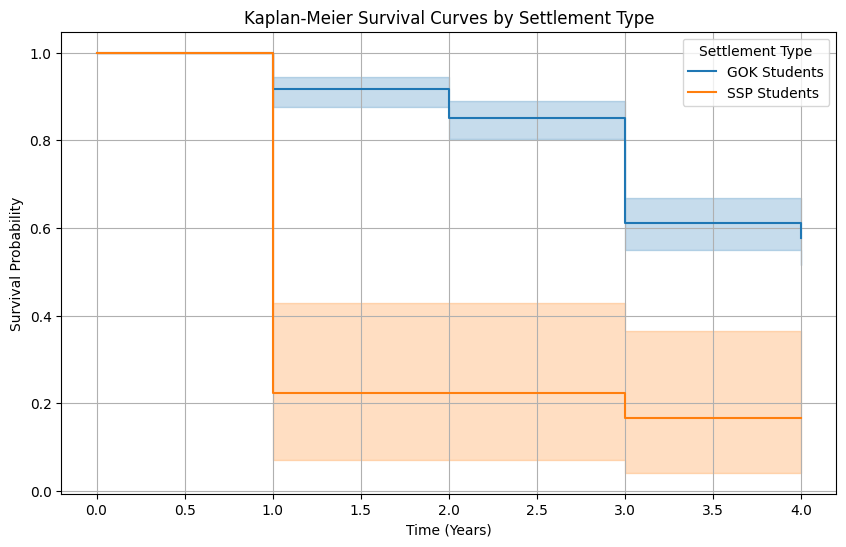

In [281]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Create an empty DataFrame to store survival probabilities and confidence intervals
survival_df = pd.DataFrame()

# Split data based on Settlement type
GOK = final_data[final_data['Settlement Type'] == "GOK"]
SSP = final_data[final_data['Settlement Type'] == "SSP"]

# Plot GOK first
plt.figure(figsize=(10,6))

# Fit the Kaplan-Meier model for GOK students
kmf.fit(durations=GOK['duration'], event_observed=GOK['Event'], label="GOK Students")
ax = kmf.plot(ci_show=True)

# Get survival probabilities and confidence intervals for GOK
survival_prob_GOK = kmf.survival_function_
ci_GOK = kmf.confidence_interval_

# Combine the survival probabilities and confidence intervals into a single DataFrame for GOK
GOK_survival_df = survival_prob_GOK.copy()
GOK_survival_df['GOK Students'] = GOK_survival_df['GOK Students']
GOK_survival_df['GOK Students_lower_0.95'] = ci_GOK['GOK Students_lower_0.95']
GOK_survival_df['GOK Students_upper_0.95'] = ci_GOK['GOK Students_lower_0.95']
GOK_survival_df['Settlement Type'] = 'GOK'  # Add the Settlement Type column for identification

# Plot SSP next (on the same axis)
kmf.fit(durations=SSP['duration'], event_observed=SSP['Event'], label="SSP Students")
kmf.plot(ax=ax, ci_show=True)

# Get survival probabilities and confidence intervals for SSP
survival_prob_SSP = kmf.survival_function_
ci_SSP = kmf.confidence_interval_

# Combine the survival probabilities and confidence intervals into a single DataFrame for SSP
SSP_survival_df = survival_prob_SSP.copy()
SSP_survival_df['SSP Students'] = SSP_survival_df['SSP Students']
SSP_survival_df['SSP Students_lower_0.95'] = ci_SSP['SSP Students_lower_0.95']
SSP_survival_df['SSP Students_upper_0.95'] = ci_SSP['SSP Students_upper_0.95']
SSP_survival_df['Settlement Type'] = 'SSP'  # Add the Settlement Type column for identification

# Concatenate the GOK and SSP survival DataFrames
survival_df = pd.concat([GOK_survival_df, SSP_survival_df],axis=1)

# Plot decoration
plt.title("Kaplan-Meier Survival Curves by Settlement Type")
plt.xlabel("Time (Years)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Settlement Type", loc='best')
plt.show() # fees 

In [282]:
SSP_survival_df

,SSP Students,SSP Students_lower_0.95,SSP Students_upper_0.95,Settlement Type
timeline,,,,
0.0,1.000000,1.000000,1.000000,SSP
1.0,0.222222,0.069120,0.428837,SSP
3.0,0.166667,0.041211,0.365424,SSP
4.0,0.166667,0.041211,0.365424,SSP


In [283]:
# Display the combined DataFrame with survival probabilities and confidence intervals
survival_df.head()  # Show the first few rows of the DataFrame


,GOK Students,GOK Students_lower_0.95,GOK Students_upper_0.95,Settlement Type,SSP Students,SSP Students_lower_0.95,SSP Students_upper_0.95,Settlement Type
timeline,,,,,,,,
0.0,1.000000,1.000000,1.000000,GOK,1.000000,1.000000,1.000000,SSP
1.0,0.916350,0.875738,0.875738,GOK,0.222222,0.069120,0.428837,SSP
2.0,0.851711,0.802713,0.802713,GOK,NaN,NaN,NaN,NaN
3.0,0.612167,0.550449,0.550449,GOK,0.166667,0.041211,0.365424,SSP
4.0,0.577947,0.515860,0.515860,GOK,0.166667,0.041211,0.365424,SSP


In [284]:
from lifelines.statistics import logrank_test

results = logrank_test(GOK['duration'], SSP['duration'], 
                       event_observed_A=GOK['Event'], 
                       event_observed_B=SSP['Event'])

results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          40.03 <0.005     31.89

### Department 

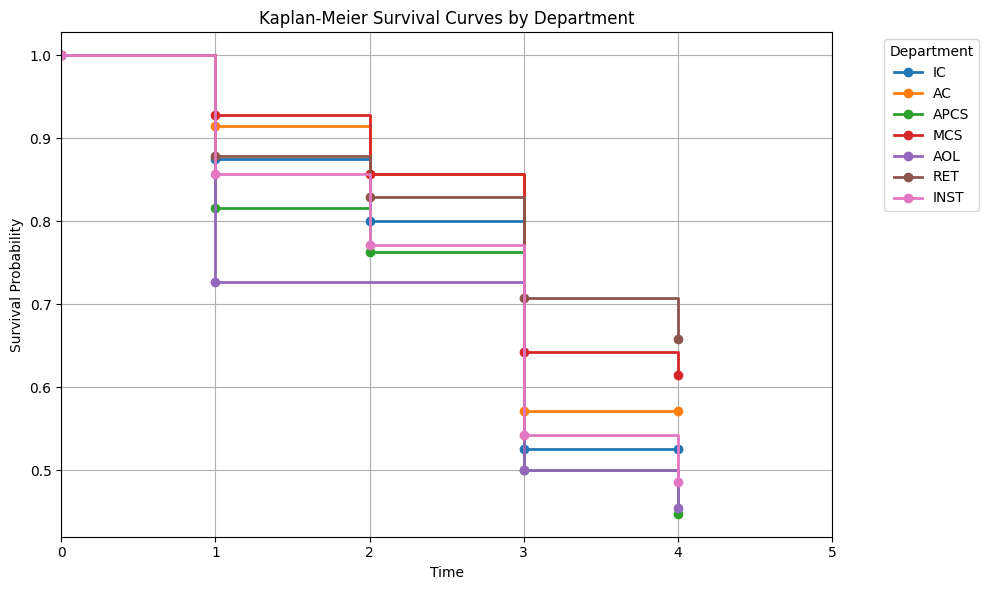

In [286]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import pandas as pd

# Initialize Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

survival_df = pd.DataFrame()


# Set up the plot
plt.figure(figsize=(10, 6))

# Plot Kaplan-Meier curves for each department with different styles
for dept in final_data['Department'].unique():
    dept_data = final_data[final_data['Department'] == dept]
    kmf.fit(dept_data['duration'], event_observed=dept_data['Event'], label=dept)

    # Get survival probabilities and confidence intervals
    survival_prob = kmf.survival_function_
    ci = kmf.confidence_interval_

    # Combine the survival probabilities and confidence intervals into a single DataFrame
    dept_survival_df = survival_prob.join(ci, rsuffix='_ci')
    dept_survival_df['Department'] = dept  # Add the department column for identification

    # Append the department-specific DataFrame to the main DataFrame
    survival_df = pd.concat([survival_df, dept_survival_df])
    
    # Plot with markers and a different line style for each department
    kmf.plot(ci_show=False, linewidth=2, marker='o', markersize=6)

# Customize the plot
plt.title('Kaplan-Meier Survival Curves by Department')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Department', loc='upper right', bbox_to_anchor=(1.2, 1))  # Legend outside plot

# Optionally, you can zoom in on a specific time range
plt.xlim(0,5)  # Adjust based on your data

# Show grid lines for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()  # Ensure there's no clipping of labels
plt.show()

# There is no much significant difference between the survival rate across the different departments in fost

In [288]:
from lifelines.statistics import logrank_test
import pandas as pd

# Create a DataFrame for your data (if not already in DataFrame format)
# Assuming 'final_data' contains 'duration', 'Event', and 'Department'

# Example: Comparing two departments (adjust as needed for more comparisons)
dept1_data = final_data[final_data['Department'] == 'MCS']
dept2_data = final_data[final_data['Department'] == 'APCS']

# Perform the Log-Rank test
results = logrank_test(dept1_data['duration'], dept2_data['duration'], 
                       event_observed_A=dept1_data['Event'], event_observed_B=dept2_data['Event'])

# Print the test results
print(f"Log-Rank Test p-value: {results.p_value}")

# Check if the p-value is significant (typically < 0.05)
if results.p_value < 0.05:
    print("There is a significant difference in survival between the two departments.")
else:
    print("There is no significant difference in survival between the two departments.")


Log-Rank Test p-value: 0.07846444642367813
There is no significant difference in survival between the two departments.


## Overall Kaplan Miere Estimates 

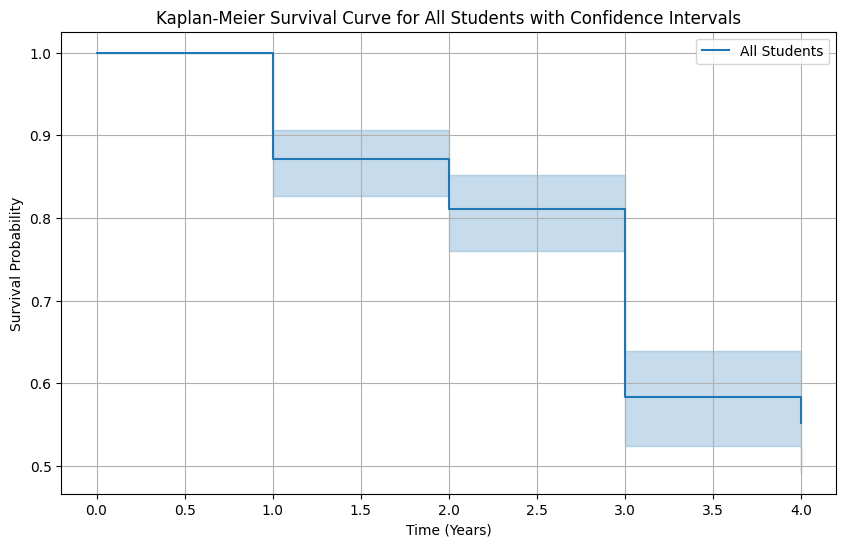

In [290]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier model for the entire dataset
kmf.fit(durations=final_data['duration'], event_observed=final_data['Event'], label="All Students")

# Plot the Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))

# Plot the survival curve with confidence intervals
ax = kmf.plot(ci_show=True)

# Get the survival probabilities and confidence intervals
survival_prob = kmf.survival_function_
ci = kmf.confidence_interval_

# Add the upper and lower confidence intervals to the plot manually (if needed)
# To fill between the upper and lower CI, we can use plt.fill_between
# plt.fill_between(survival_prob.index, ci['All Students_lower_0.95'], ci['All Students_upper_0.95'], color='g', alpha=0.2)

# Plot decoration
plt.title("Kaplan-Meier Survival Curve for All Students with Confidence Intervals")
plt.xlabel("Time (Years)")
plt.ylabel("Survival Probability")
plt.grid(True)

# Show the plot
plt.show()


### Loglikelihood Test

In [293]:
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test
import numpy as np
import pandas as pd
from scipy import stats

# 1. Likelihood Ratio Test
llr_statistic = -2 * (ctv1.log_likelihood_ - ctv2.log_likelihood_)
p_value = 1 - stats.chi2.cdf(llr_statistic, df=1)  # Degrees of freedom depends on the number of additional parameters in model 2
print(f"Likelihood Ratio Test p-value: {p_value}")

# 2. Wald Test (to check individual coefficients' significance)
ctv1.print_summary()
ctv2.print_summary() #If p < 0.05: Reject the null → additional variable(s) significantly improve the model.

Likelihood Ratio Test p-value: 0.0006558577027983015


<lifelines.CoxTimeVaryingFitter: fitted with 888 periods, 281 subjects, 107 events>
         event col = 'Event'
number of subjects = 281
 number of periods = 888
  number of events = 107
partial log-likelihood = -479.45
  time fit was run = 2025-05-09 14:01:26 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
Gender         0.68      1.97      0.27            0.15            1.20                1.16                3.34
Department     0.12      1.13      0.05            0.02            0.22                1.02                1.25
settlement    -1.76      0.17      0.35           -2.45           -1.07                0.09                0.34
Grade          1.33      3.79      0.12            1.10            1.56                3.00                4.77
supplementary -0.50      0.60      0.22           -0.93           -0.08                0.40                0.92
work_study     0.79      2.21      1.03           -1.22            2.81                0.29               16.58

               cmp to     z      p  -log2(p)
covariate                                   
Gender           0.00  2.50   0.01      6.35
Department       0.00  2.30   0.02      5.55
settlement       0.00 -5.01 <0.005     20.78
Grade            0.00 11.28 <0.005     95.62
supplementary    0.00 -2.33   0.02      5.67
work_study       0.00  0.77   0.44      1.18
---
Partial AIC = 970.90
log-likelihood ratio test = 184.73 on 6 df
-log2(p) of ll-ratio test = 121.17

<lifelines.CoxTimeVaryingFitter: fitted with 888 periods, 281 subjects, 107 events>
         event col = 'Event'
number of subjects = 281
 number of periods = 888
  number of events = 107
partial log-likelihood = -473.64
  time fit was run = 2025-05-09 14:03:14 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
Gender               0.70      2.01      0.27            0.17            1.23                1.18                3.42
Department           0.12      1.13      0.05            0.02            0.22                1.02                1.24
settlement          -1.72      0.18      0.35           -2.41           -1.04                0.09                0.35
Grade                1.53      4.62      0.14            1.26            1.80                3.53                6.03
supplementary        3.52     33.89      1.15            1.26            5.78                3.54              324.43
Grade_supplementary -1.04      0.35      0.30           -1.63           -0.45                0.20                0.64

                     cmp to     z      p  -log2(p)
covariate                                         
Gender                 0.00  2.58   0.01      6.68
Department             0.00  2.30   0.02      5.55
settlement             0.00 -4.91 <0.005     20.08
Grade                  0.00 11.20 <0.005     94.30
supplementary          0.00  3.06 <0.005      8.80
Grade_supplementary    0.00 -3.46 <0.005     10.88
---
Partial AIC = 959.29
log-likelihood ratio test = 196.34 on 6 df
-log2(p) of ll-ratio test = 129.37